# Machine Learning Models for ELA Scores
### Courtney Drysdale - MSDS 692 - 2025 Fall 8W1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("2025_data_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District Code                  161 non-null    int64  
 1   District Name                  161 non-null    object 
 2   ELA                            161 non-null    float64
 3   Math                           161 non-null    float64
 4   Attendance Rate                161 non-null    float64
 5   Truancy Rate                   161 non-null    float64
 6   PK-12 Count                    161 non-null    int64  
 7   Teacher FTE                    161 non-null    float64
 8   Percent Minority               161 non-null    float64
 9   Percent Female                 161 non-null    float64
 10  Percent Male                   161 non-null    float64
 11  Percent Non-Binary             161 non-null    float64
 12  Average Teacher Salary         161 non-null    flo

In [4]:
df.head()

,District Code,District Name,ELA,Math,Attendance Rate,Truancy Rate,PK-12 Count,Teacher FTE,Percent Minority,Percent Female,Percent Male,Percent Non-Binary,Average Teacher Salary,Percent Teacher Minority,Staff Turnover Rate,Federal Funding Per Pupil,State/Local Funding Per Pupil,Student Teacher Ratio,Total Funding Per Pupil
0,10,Mapleton 1,23.9,17.0,0.905,0.050,7095,404.6,0.875,0.499,0.501,0.0000,84216.0,0.224638,0.1961,525.0,14362.0,17.535838,14887.0
1,20,Adams 12 Five Star Schools,42.2,34.2,0.900,0.050,34466,2019.5,0.608,0.484,0.515,0.0008,78778.0,0.141951,0.1836,1008.0,14877.0,17.066601,15885.0
2,30,Adams County 14,12.9,8.6,0.879,0.091,5221,318.9,0.924,0.466,0.534,0.0000,77089.0,0.469697,0.2577,1988.0,15753.0,16.371903,17741.0
3,40,School District 27J,32.4,25.2,0.914,0.038,24014,1231.0,0.635,0.486,0.514,0.0001,76638.0,0.163282,0.1863,440.0,10788.0,19.507717,11228.0
4,50,Bennett 29J,27.7,17.6,0.924,0.028,1793,91.0,0.619,0.481,0.519,0.0000,53818.0,0.161290,0.3415,481.0,13661.0,19.703297,14142.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
District Code,161.0,1747.459627,1252.930260,10.000000,940.000000,1540.000000,2650.000000,9170.000000
ELA,161.0,38.351553,13.738946,10.400000,28.600000,36.500000,47.500000,70.000000
Math,161.0,28.334783,12.656610,4.900000,18.400000,27.300000,35.800000,69.800000
Attendance Rate,161.0,0.918161,0.042621,0.441000,0.909000,0.920000,0.935000,0.986000
Truancy Rate,161.0,0.025534,0.018745,0.000000,0.014000,0.021000,0.031000,0.098000
PK-12 Count,161.0,5449.291925,12942.261207,47.000000,277.000000,769.000000,3195.000000,90450.000000
Teacher FTE,161.0,330.100621,788.772536,5.700000,21.500000,53.200000,194.500000,6047.000000
Percent Minority,161.0,0.394335,0.218994,0.081000,0.217000,0.337000,0.552000,0.924000
Percent Female,161.0,0.483863,0.024064,0.412000,0.472000,0.484000,0.496000,0.553000
Percent Male,161.0,0.515950,0.024151,0.447000,0.504000,0.515000,0.528000,0.588000


Now I will make a new column that has a value for whether or not the district's score was at or above the average or below the average score for the state. The mean for ELA score is 38.351553, so that will be the threshold. The machine learning algorithm will predict whether or not a district's overall scores will be below or at or above average.

In [6]:
mean = 38.351553
df['ELA Score'] = np.where(df['ELA'] > mean, 1, 0)

### Correlation Plot

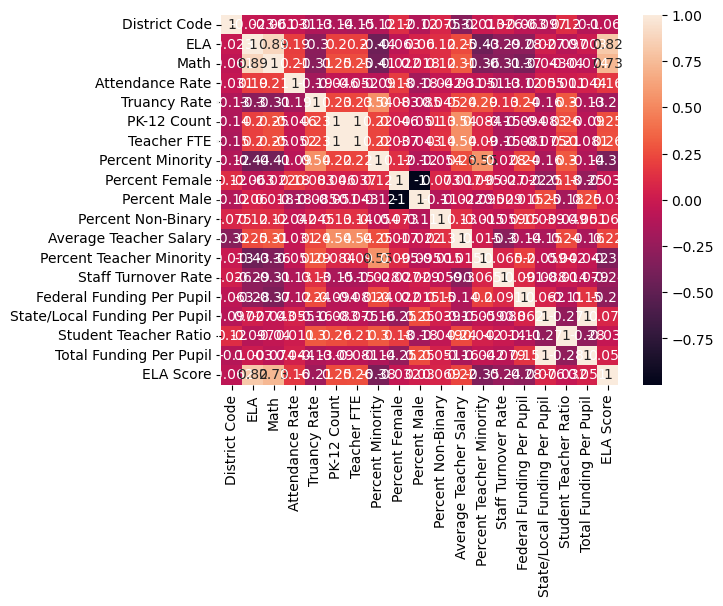

In [7]:
_ = sns.heatmap(df.corr(), annot=True)

In [8]:
df = df.drop(columns = ['District Code', 'District Name', 'ELA', 'Math', 'PK-12 Count',
                       'Teacher FTE', 'Percent Female', 'Percent Non-Binary'], axis = 1)

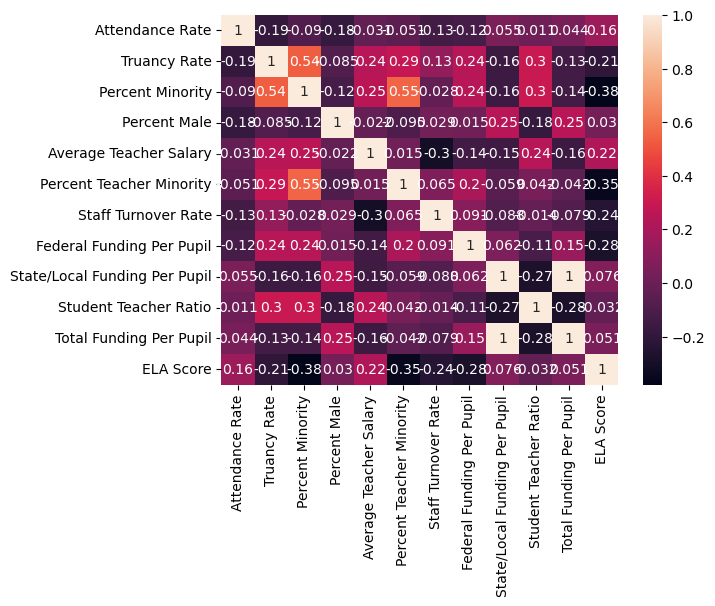

In [9]:
_ = sns.heatmap(df.corr(), annot=True)

First I'll try a decision tree model to see how it does.

## Decision Tree

In [16]:
cols = df.columns

prediction_col = 'ELA Score'
feature_cols = [c for c in cols if c != prediction_col]

x = df[feature_cols].values
y = df[prediction_col].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

preds_tree = tree_model.predict(x_test)

In [18]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_tree)

Actuals for test data set
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1]


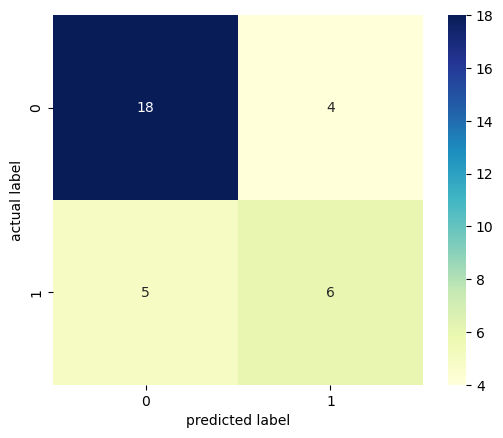

In [19]:
cm = confusion_matrix(y_test, preds_tree)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [20]:
print(accuracy_score(y_test,preds_tree))

0.7272727272727273


In [21]:
print(roc_auc_score(y_test, preds_tree))

0.6818181818181817


In [22]:
importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Percent Minority', 0.23159963842744208),
 ('Staff Turnover Rate', 0.1691270430866568),
 ('Average Teacher Salary', 0.16441980598532985),
 ('State/Local Funding Per Pupil', 0.14498599439775908),
 ('Total Funding Per Pupil', 0.08366013071895424),
 ('Percent Male', 0.08338126361655775),
 ('Truancy Rate', 0.07051364321952557),
 ('Federal Funding Per Pupil', 0.028783068783068796),
 ('Attendance Rate', 0.023529411764705882),
 ('Percent Teacher Minority', 0.0),
 ('Student Teacher Ratio', 0.0)]

Looks like some of these don't help at all, so I could take them out.

Next, I will try a random forest model.

## Random Forest

In [23]:
forest_model = RandomForestClassifier(n_jobs = -1, random_state=42)
forest_model.fit(x_train,y_train)

forest_preds = forest_model.predict(x_test)

In [24]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1]


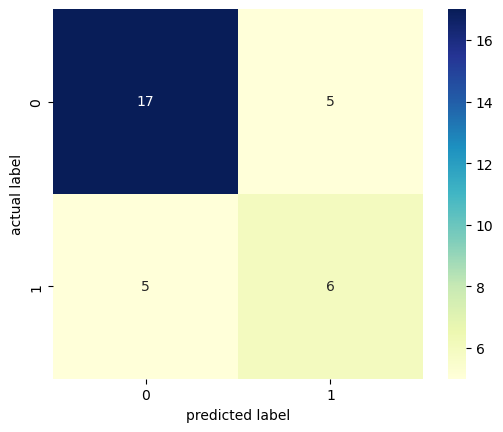

In [25]:
cm = confusion_matrix(y_test, forest_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [26]:
print(accuracy_score(y_test,forest_preds))

0.696969696969697


In [27]:
print(roc_auc_score(y_test, forest_preds))

0.6590909090909091


In [28]:
importance_list = list(zip(feature_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Percent Minority', 0.17277226812050694),
 ('Staff Turnover Rate', 0.12783172044434019),
 ('Average Teacher Salary', 0.1052051509770473),
 ('Percent Teacher Minority', 0.0960985801772439),
 ('Percent Male', 0.08935858560464861),
 ('Federal Funding Per Pupil', 0.08691566302578889),
 ('Truancy Rate', 0.08424428921858469),
 ('Total Funding Per Pupil', 0.07147891439599138),
 ('Attendance Rate', 0.06266800820907813),
 ('State/Local Funding Per Pupil', 0.05239505350668844),
 ('Student Teacher Ratio', 0.05103176632008161)]

This performed slightly better, but I think we could still do better. I'll look into naive bayes next.

## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
preds_nb = model_nb.predict(x_test)

In [31]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_nb)

Actuals for test data set
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


In [32]:
print(accuracy_score(y_test,preds_nb))

0.6666666666666666


In [33]:
print(roc_auc_score(y_test, preds_nb))

0.5454545454545454


In [34]:
print(classification_report(y_test, preds_nb))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        22
           1       0.50      0.18      0.27        11

    accuracy                           0.67        33
   macro avg       0.59      0.55      0.53        33
weighted avg       0.63      0.67      0.61        33



Naive Bayes did not perform as well. 

Next I'll scale the data for the other models. I'm going to use the StandardScaler.

## Logistic Regression

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(x_train)

StandardScaler()

In [38]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

preds_lr = model_lr.predict(x_test)

In [40]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_lr)

Actuals for test data set
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [41]:
print(accuracy_score(y_test,preds_lr))

0.7878787878787878


In [42]:
print(roc_auc_score(y_test, preds_lr))

0.75


In [43]:
print(classification_report(y_test, preds_lr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.70      0.64      0.67        11

    accuracy                           0.79        33
   macro avg       0.76      0.75      0.76        33
weighted avg       0.78      0.79      0.79        33



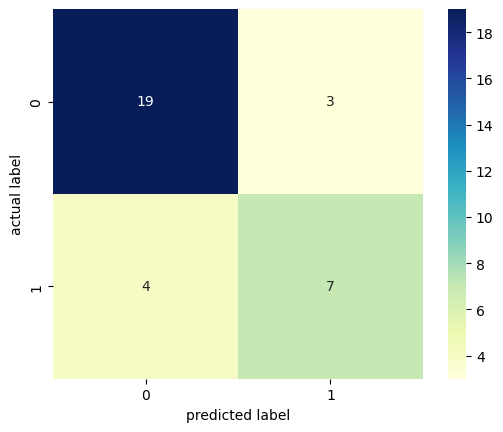

In [44]:
cm_lr = confusion_matrix(y_test, preds_lr)
target_labels = np.unique(y_test)

sns.heatmap(cm_lr, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

I want to know how each of these factored in to the model, so since it's linear regression I'll look at the coefficient magnitude. [This site](https://www.statology.org/sklearn-regression-coefficients/) helped me have the correct way to find and display this information. 

In [45]:
coef_dict = dict(zip(feature_cols, model_lr.coef_.flatten()))

In [46]:
coef_dict

{'Attendance Rate': -0.009986720682659378,
 'Truancy Rate': 0.05356831513602581,
 'Percent Minority': -0.8396079096680686,
 'Percent Male': -0.02069559280001151,
 'Average Teacher Salary': 0.6584767179825005,
 'Percent Teacher Minority': -0.4508363259868463,
 'Staff Turnover Rate': -0.5715600545077792,
 'Federal Funding Per Pupil': -0.3508039259063606,
 'State/Local Funding Per Pupil': 0.11063299039865024,
 'Student Teacher Ratio': -0.13650871172295462,
 'Total Funding Per Pupil': 0.0823024798188821}

## Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier  

mlp = MLPClassifier(hidden_layer_sizes=(30, 100, 10, 40), max_iter=1000)  
mlp.fit(x_train, y_train)  

MLPClassifier(hidden_layer_sizes=(30, 100, 10, 40), max_iter=1000)

In [48]:
preds_nn = mlp.predict(x_test)

In [49]:
print(preds_nn)

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1]


In [50]:
print(accuracy_score(y_test,preds_nn))

0.6363636363636364


In [51]:
print(roc_auc_score(y_test, preds_nn))

0.6136363636363638


In [52]:
print(confusion_matrix(y_test,preds_nn))  
print(classification_report(y_test,preds_nn))

[[15  7]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        22
           1       0.46      0.55      0.50        11

    accuracy                           0.64        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.65      0.64      0.64        33



## K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model_knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [55]:
preds_knn = model_knn.predict(x_test)

print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_knn)

Actuals for test data set
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0]


In [56]:
print(accuracy_score(y_test,preds_knn))

0.6666666666666666


In [57]:
print(roc_auc_score(y_test, preds_knn))

0.6136363636363636


In [58]:
print(confusion_matrix(y_test,preds_knn))  
print(classification_report(y_test,preds_knn))  

[[17  5]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.50      0.45      0.48        11

    accuracy                           0.67        33
   macro avg       0.62      0.61      0.62        33
weighted avg       0.66      0.67      0.66        33



The algorithm improves with different numbers of neighbors, but still not as good as logistic regression.

## ELA Score Conclusion

For the ELA scores, the logistic regression model performed the best with a 0.7878 accuracy score and 0.75 roc_auc score. Using this model, I looked at the coefficient magnitude of each feature to determine what most helped the model classify the scores.

#### Largest Coefficient Magnitudes
- Percent Minority: -0.8396
- Average Teacher Salary: 0.6585
- Staff Turnover Rate: -0.5716
- Federal Funding Per Pupil: -0.3508

While the percent of the student population that are minorities was the largest coefficient magnitude, this is not something that a school district can change. However, a district and state can know that it may need to provide more support for schools and districts that have higher minority student populations.

Next, average teacher salary is something a district could try to prioritize and change. This coefficient magnitude was positive, so it has a positive correlation on the school district have above average ELA scores. 

The Staff Turnover Rate was a negative coefficient magnitude, which means a higher staff turnover means worse ELA scores. This could be improved in a district if they put some practices in place to prevent staff turnover.

Finally, the Federal Funding Per Pupil was also a negative coefficient magnitude, which is very interesting! The federal funding is not something states or districts have a great amount of control over. Also interestingly, there was a slight positive coefficient magnitude for State/Local Funding Per Pupil and for Total Funding Per Pupil. 

These findings could be used by a district or school to try supporting these other areas to see if improving these areas also helps students improve their ELA scores.